<a href="https://colab.research.google.com/github/Elwing-Chou/tiba0619/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
# ((nparray:x_train, nparray:y_train), (nparray:x_test, nparray:y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 8s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
y_train = y_train.reshape(50000)
y_test = y_test.reshape(10000)

In [3]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

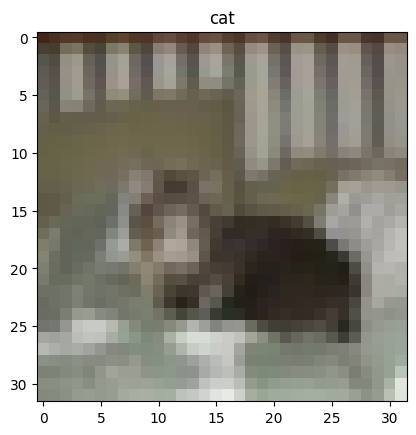

In [4]:
import matplotlib.pyplot as plt

idx = 150
plt.title("{}".format(trans[y_train[idx]]))
plt.imshow(x_train[idx])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

l = [
    # 1個filter(3 * 3 * 3) * 64(種過濾方式 + 64(bias)
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種過濾方式) + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

l = [
    # 1個filter(3 * 3 * 3) * 64(種過濾方式 + 64(bias)
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種過濾方式) + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256)       

In [11]:
# 如果你使用sparse版本妳就不用自己做y的one-hot(節省ram)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [12]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=100,
     validation_split=0.1,
     callbacks=c)

Epoch 1/100
225/225 [==============================] - 7s 21ms/step - loss: 1.6612 - accuracy: 0.3847 - val_loss: 1.3383 - val_accuracy: 0.5198
Epoch 2/100
225/225 [==============================] - 4s 19ms/step - loss: 1.2247 - accuracy: 0.5600 - val_loss: 1.1330 - val_accuracy: 0.5876
Epoch 3/100
225/225 [==============================] - 4s 19ms/step - loss: 1.0324 - accuracy: 0.6352 - val_loss: 0.9703 - val_accuracy: 0.6604
Epoch 4/100
225/225 [==============================] - 4s 19ms/step - loss: 0.8797 - accuracy: 0.6934 - val_loss: 0.8348 - val_accuracy: 0.7112
Epoch 5/100
225/225 [==============================] - 4s 19ms/step - loss: 0.7752 - accuracy: 0.7290 - val_loss: 0.8032 - val_accuracy: 0.7240
Epoch 6/100
225/225 [==============================] - 4s 19ms/step - loss: 0.6891 - accuracy: 0.7587 - val_loss: 0.7488 - val_accuracy: 0.7462
Epoch 7/100
225/225 [==============================] - 4s 20ms/step - loss: 0.6219 - accuracy: 0.7840 - val_loss: 0.7101 - val_accuracy:

In [14]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.7775


[0.6917780637741089, 0.7774999737739563]

In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
pd.DataFrame(confusion_matrix(y_test, pre),
       columns=["{}(pre)".format(trans[i]) for i in range(10)],
       index=["{}(true)".format(trans[i]) for i in range(10)])

313/313 [==============================] - 1s 3ms/step


,airplane(pre),automobile(pre),bird(pre),cat(pre),deer(pre),dog(pre),frog(pre),horse(pre),ship(pre),truck(pre)
airplane(true),851,16,26,7,22,4,6,5,36,27
automobile(true),10,880,8,5,3,5,4,3,22,60
bird(true),70,6,696,33,81,53,34,17,4,6
cat(true),29,9,63,524,83,198,49,21,10,14
deer(true),11,2,50,27,821,34,22,25,4,4
dog(true),18,4,31,96,50,746,14,25,9,7
frog(true),6,6,53,41,34,30,809,3,10,8
horse(true),16,3,32,26,88,65,5,752,3,10
ship(true),75,19,15,5,13,2,1,1,855,14
truck(true),38,68,9,5,3,8,3,2,23,841


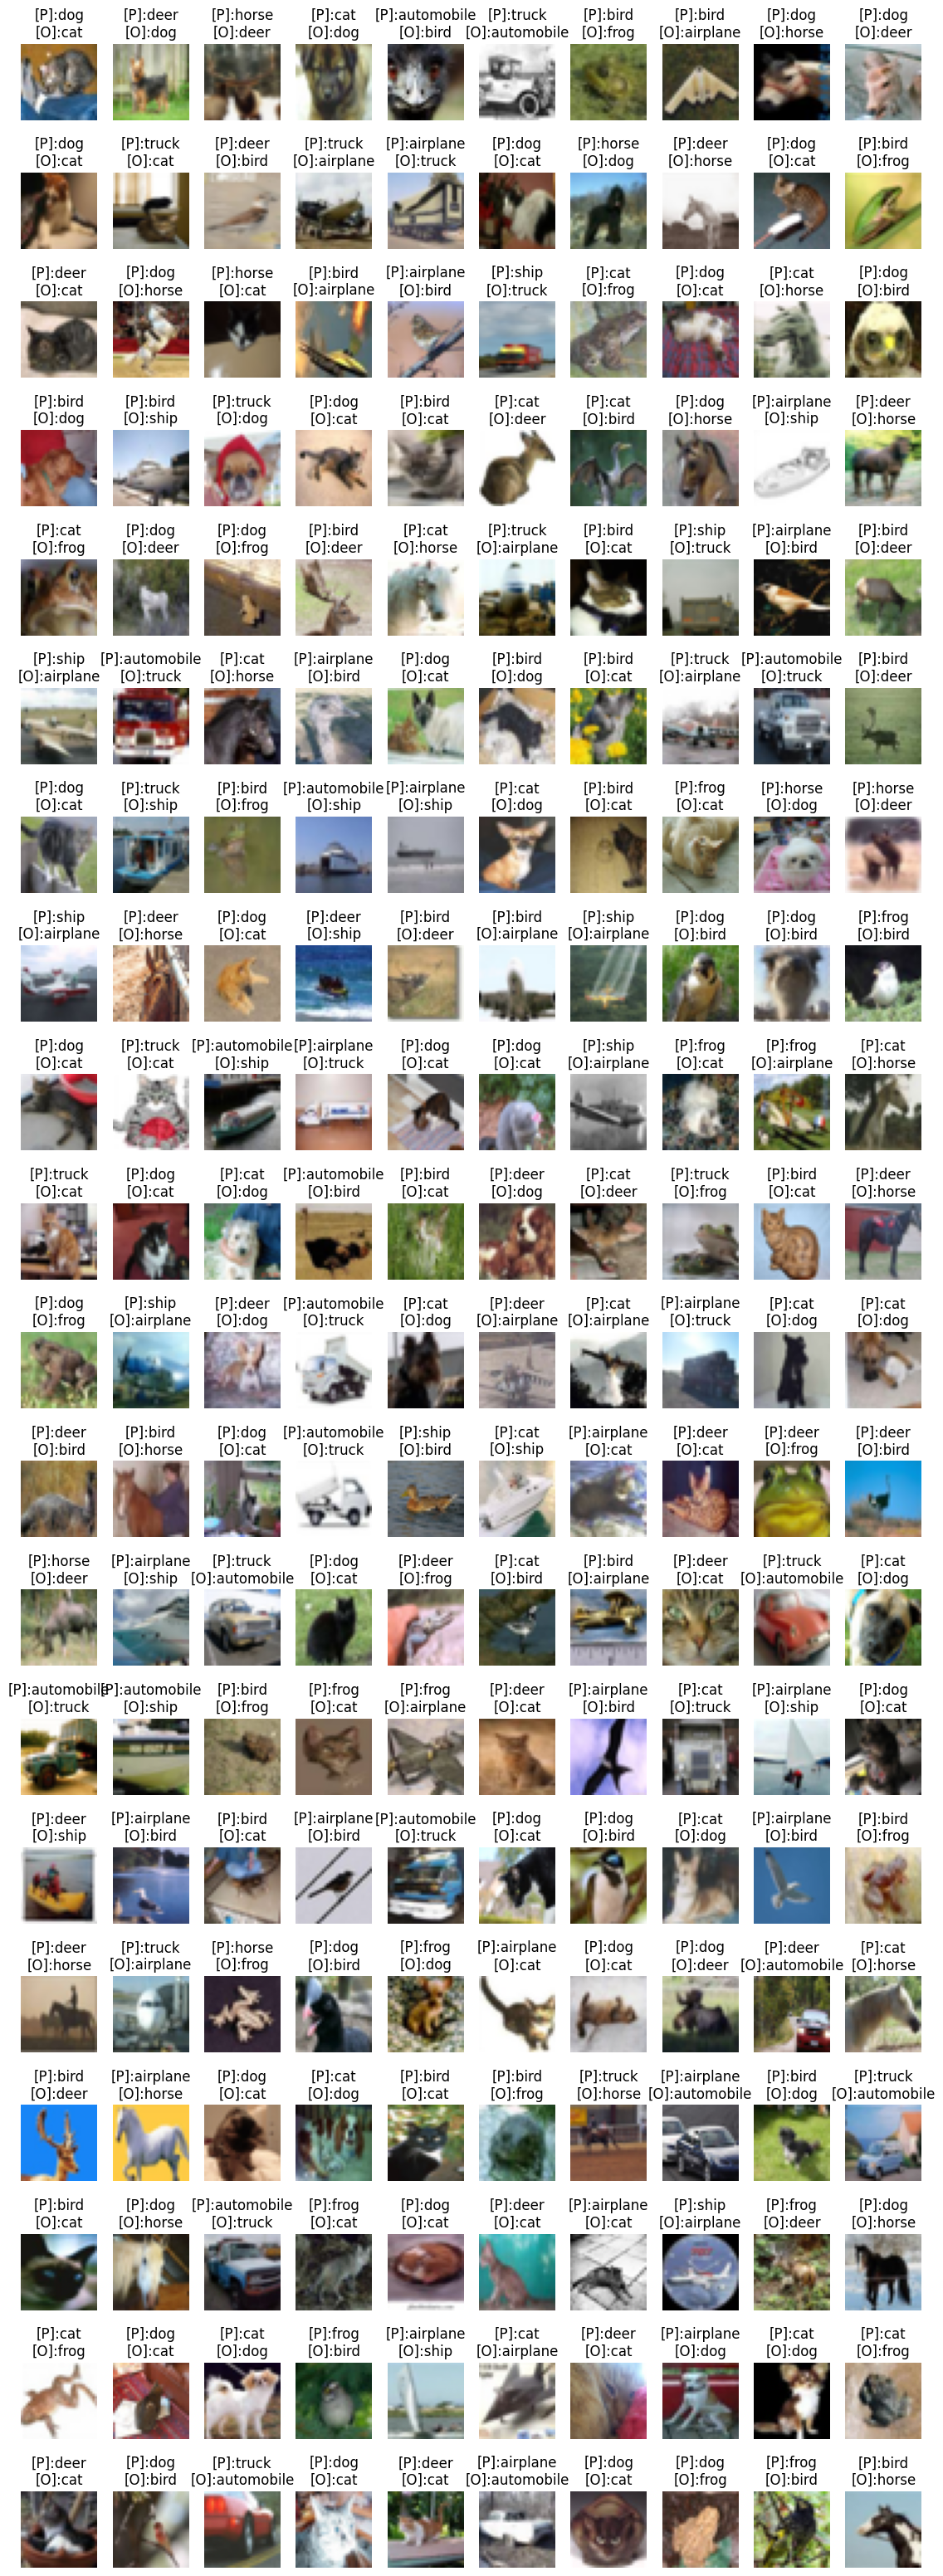

In [23]:
import numpy as np
# !!!
idx = np.nonzero(pre != y_test)[0][:200]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
width = 10
height= len(idx) // 10 + 1
plt.figure(figsize=(14, 42))
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(trans[false_pre[i]],
                   trans[false_true[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
# 手動儲存模型: model.save("xxx.h5")
import os
from tensorflow.keras.models import load_model
if not os.path.exists("cnn.h5"):
    # model = xxx
    # model.comile()
    pass
else:
    model = load_model("cnn.h5")

1/1 [==============================] - 0s 21ms/step
airplane 的機率: 0.0
automobile 的機率: 0.0
bird 的機率: 0.0
cat 的機率: 1.0
deer 的機率: 0.0
dog 的機率: 0.0
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.0
truck 的機率: 0.0


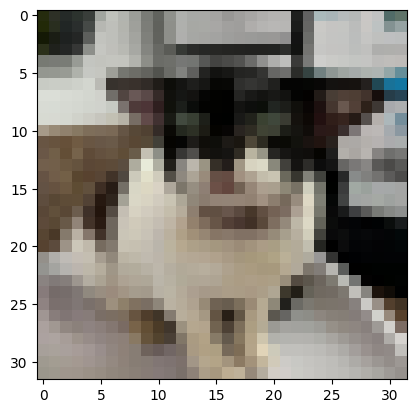

In [33]:
import requests
from PIL import Image
url = "https://5b0988e595225.cdn.sohucs.com/images/20191221/c2ae7941696d4043af4dc825b71f7976.jpeg" #@param {type:"string"}
response = requests.get(url, stream=True)
img = Image.open(response.raw).convert("RGB").resize((32, 32))
img_np = np.array(img).reshape(1, 32, 32, 3)
probs = model.predict(img_np)[0]
for t, p in zip(trans, probs):
    print(t, "的機率:", round(p, 3))
plt.imshow(img)